## Importing the libraries

Dataset Attributes
    
- **Sl_No** : Unique ID assigned to the customer
- **Customer Key** : Some customer key, most values are unique
- **Avg_Credit_Limit** : Average credit limit
- **Total_Credit_Cards** : Total number of credit cards
- **Total_visits_bank** : Total number of onsite bank visits
- **Total_visits_online** : Total number of online bank visits
- **Total_calls_made** : Total number of calls made

Source: https://www.kaggle.com/datasets/aryashah2k/credit-card-customer-data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(
    "https://raw.githubusercontent.com/IvanReznikov/bk_clustering/main/data/examples_csv/credit_card_data.csv"
)

In [3]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
dataset["Sl_No"].nunique(), dataset["Customer Key"].nunique()

(660, 655)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
features = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]

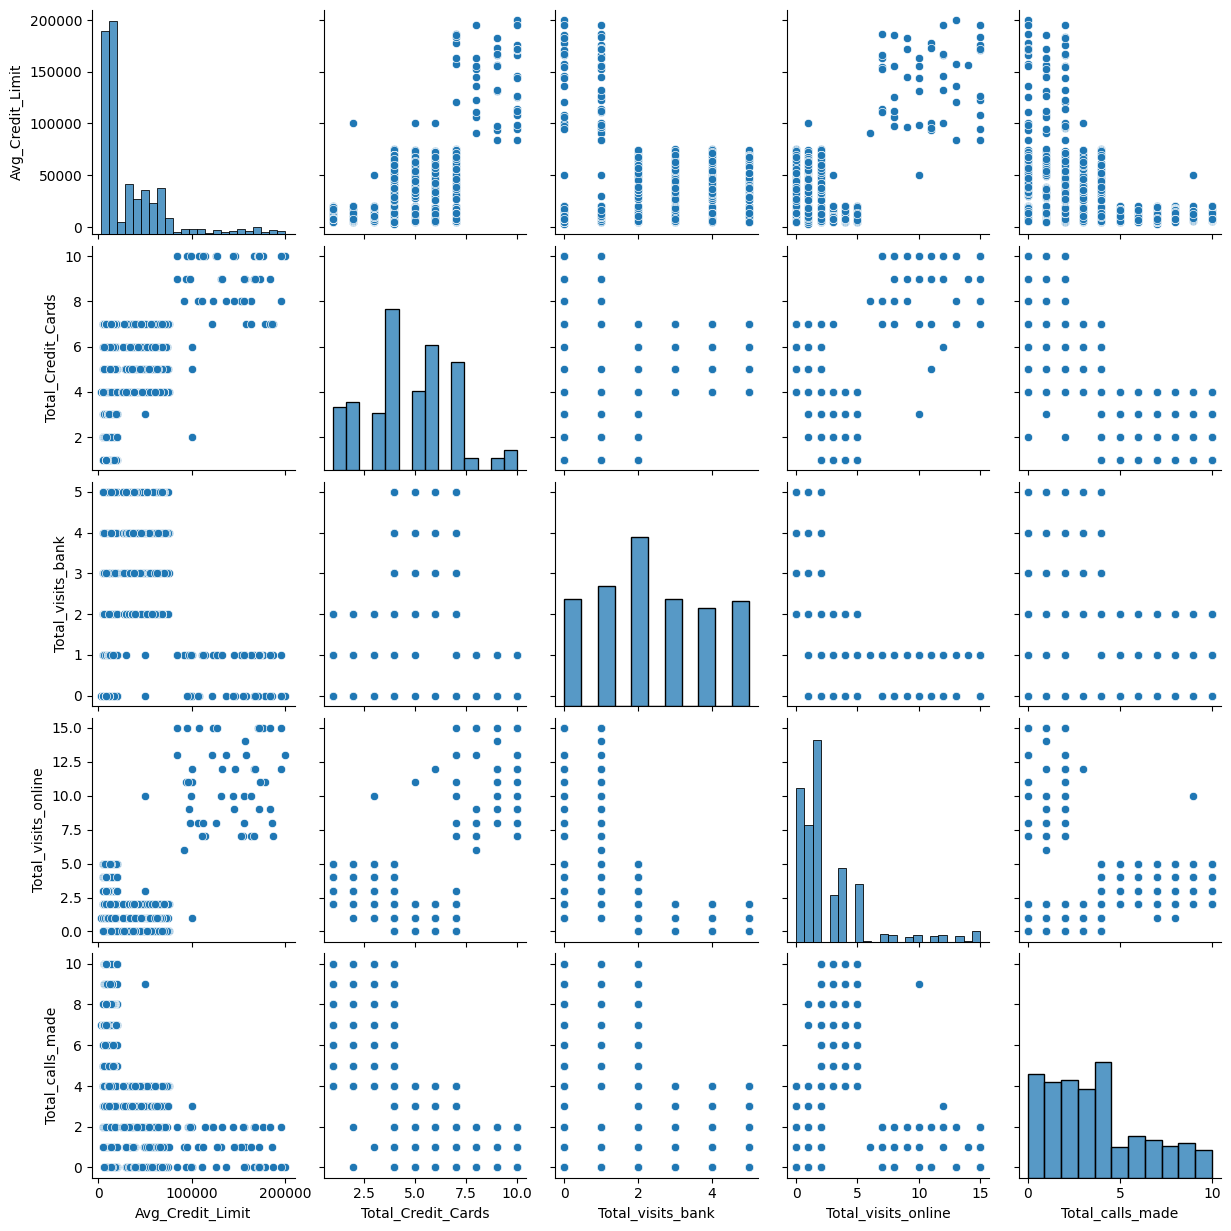

In [7]:
sns.pairplot(dataset.loc[:, features])

<Axes: >

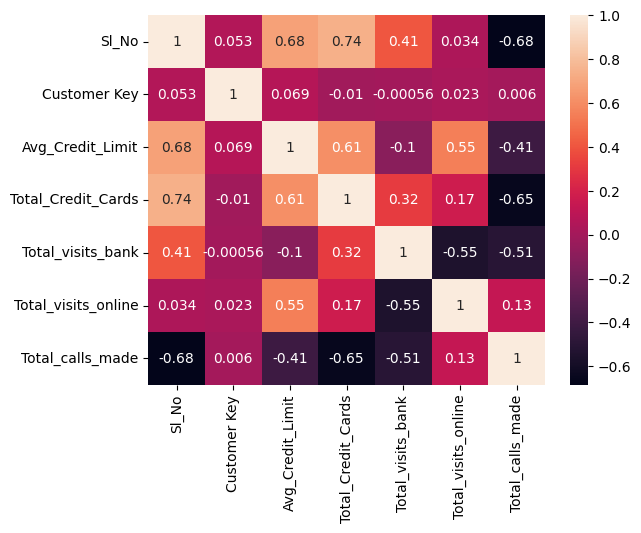

In [8]:
sns.heatmap(dataset.corr(), annot=True)

## Burj Khalifa Clustering

In [9]:
import bk_clustering
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = dataset.loc[:, features].values
X.shape

(660, 5)

In [11]:
# For distance-based methods it makes sense to perform data scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)

In [12]:
bk_model = bk_clustering.BurjKhalifaClustering()
bk_model.fit(scaled_features)

In [13]:
# Total number of clusters
bk_model.n_clusters

4

In [14]:
dataset["label"] = bk_model.labels_
dataset["label"].value_counts()

label
3    228
2    219
1    163
0     50
Name: count, dtype: int64

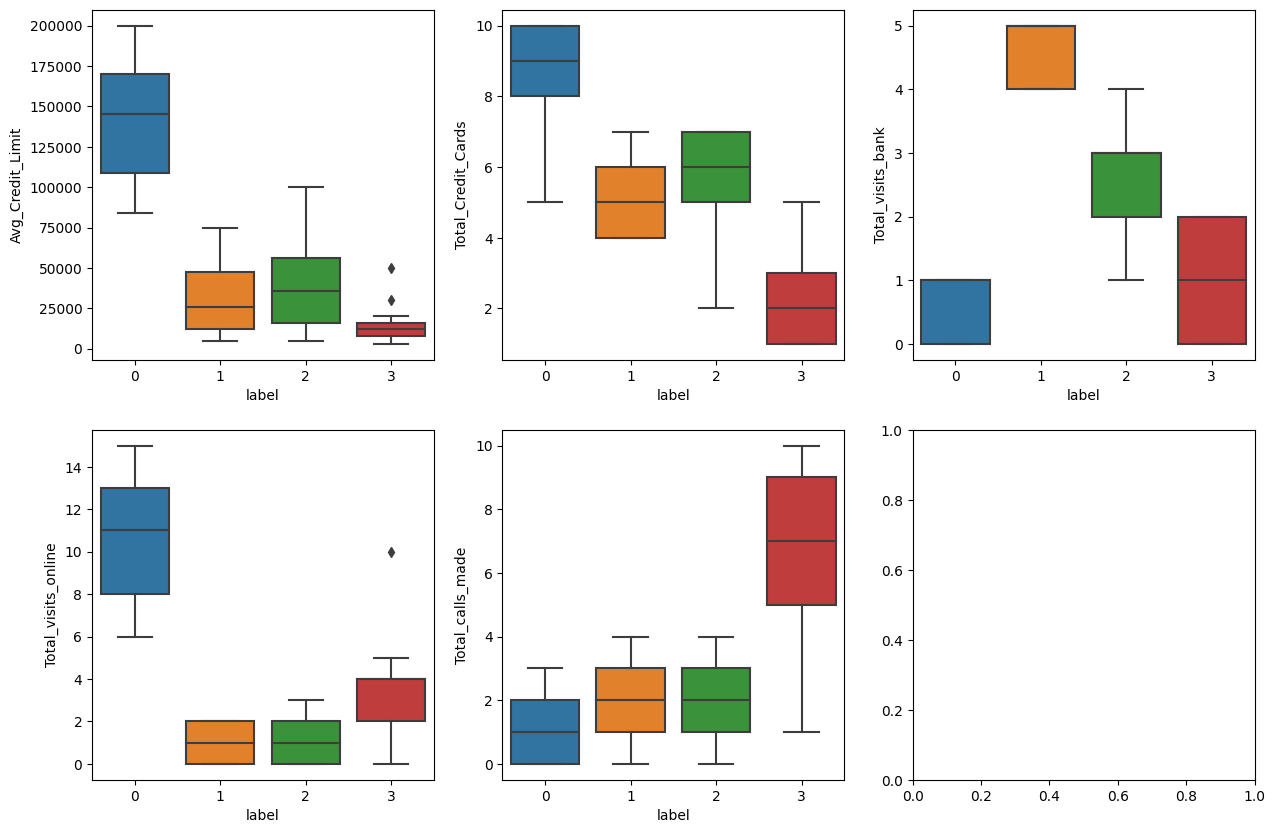

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for idx, feature in enumerate(features):
    sns.boxplot(x="label", y=feature, data=dataset, ax=axs[idx // 3, idx % 3])
plt.show()

## Clusters meaning and business actions

Label 0 customers: 

    -high average credit limit
    -large number of credit cards
    -does not visit the bank at all with high number of online visits
    -low number of phone calls 
Based on the given characteristics, it seems that these bank customers are *tech-savvy individuals* who prefer to conduct their banking activities online rather than visiting a physical bank branch or making phone calls.

Given their high average credit limit and large number of credit cards, they may be **interested in premium credit card services, such as cashback rewards, travel benefits, or exclusive access to events or experiences**. They may also be **interested in investment products or wealth management services that can help them grow and manage their wealth**.

Additionally, since they prefer to bank online, they may **appreciate digital tools that make banking more convenient, such as mobile banking apps with features like check deposit, bill pay, and account alerts**. They may also be **interested in personalized financial advice or planning services that can help them reach their financial goals**.

-----------

Label 1 customers: 

    -average credit limit
    -median of 5 credit cards
    -visit the bank a lot at all with minimal online visits
    -average number of phone calls 
   
Based on the given characteristics, these bank customers seem to **prefer traditional banking methods and may not be as comfortable with conducting banking activities online**.

Given their average credit limit and median number of credit cards, they may be **interested in more basic credit card services, such as low interest rates or balance transfer options**. They may also appreciate **services that can help them manage their credit, such as credit score monitoring or credit counseling**.

Since they tend to visit the bank frequently and make more phone calls, they may value **personalized customer service and assistance. Offering services such as financial planning or investment advice in person or over the phone could be appealing to this group**.

Additionally, since they may not be as familiar with online banking, it may be helpful to **offer them resources and education to help them become more comfortable with digital tools, such as online banking portals and mobile apps**.

-----------

Label 2 customers: 

    -average credit limit
    -median of 6 credit cards
    -visit the bank averagely from time to time with minimal online visits
    -average number of phone calls 
   
Based on the given characteristics, this group of bank customers seems to have similar credit limits and number of credit cards to the second group, but they visit the bank less frequently and have minimal online visits.

Given their average credit limit and median number of credit cards, they may be **interested in credit card services that offer rewards or cashback programs, as well as products that can help them manage their credit and debt, such as balance transfer offers or credit counseling services**.

Since they visit the bank from time to time and make an average number of phone calls, **they may value a mix of traditional and digital banking methods. Offering services such as mobile banking apps, online account management, and in-person customer service could be appealing to this group**.

Compared to the second group, this group seems to be slightly more comfortable with digital banking methods, as they have a higher median number of credit cards. However, they still value the ability to visit the bank in person and make phone calls for assistance.

Possibly, label 1 and 2 can be grouped, but the method believes the difference is significant

-----------

Label 3 customers: 

    -low credit limit
    -low number of credit cards
    -visit the bank rarely with average online banking visits
    -high number of phone calls 
    
Based on the given characteristics, this group of bank customers has a low credit limit and low number of credit cards, which suggests that they may be *new to credit or have a limited credit history*.

Given their low credit limit, they may be **interested in credit-building products such as secured credit cards or credit-building loans, which can help them establish or improve their credit score**. They may also **appreciate basic banking services such as checking and savings accounts with low fees**.

Since they visit the bank rarely and make a high number of phone calls, they may **value personalized customer service and assistance. Offering services such as financial counseling or debt management services over the phone could be appealing to this group**.

Given their average online banking visits, they **may be open to using digital banking tools to manage their accounts, such as online banking portals or mobile apps. However, it may be helpful to offer them education and resources to help them become more comfortable with these tools**.